# HR Analytics Project- Understanding the Attrition in HR

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

In [1]:
#data visulaisation and manipulation
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#importing the necessary modelling algos 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In all we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()    #no null or Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA

hence this is a binary classification peoblem here are som analysis

In [8]:
#univariate ananlysis

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


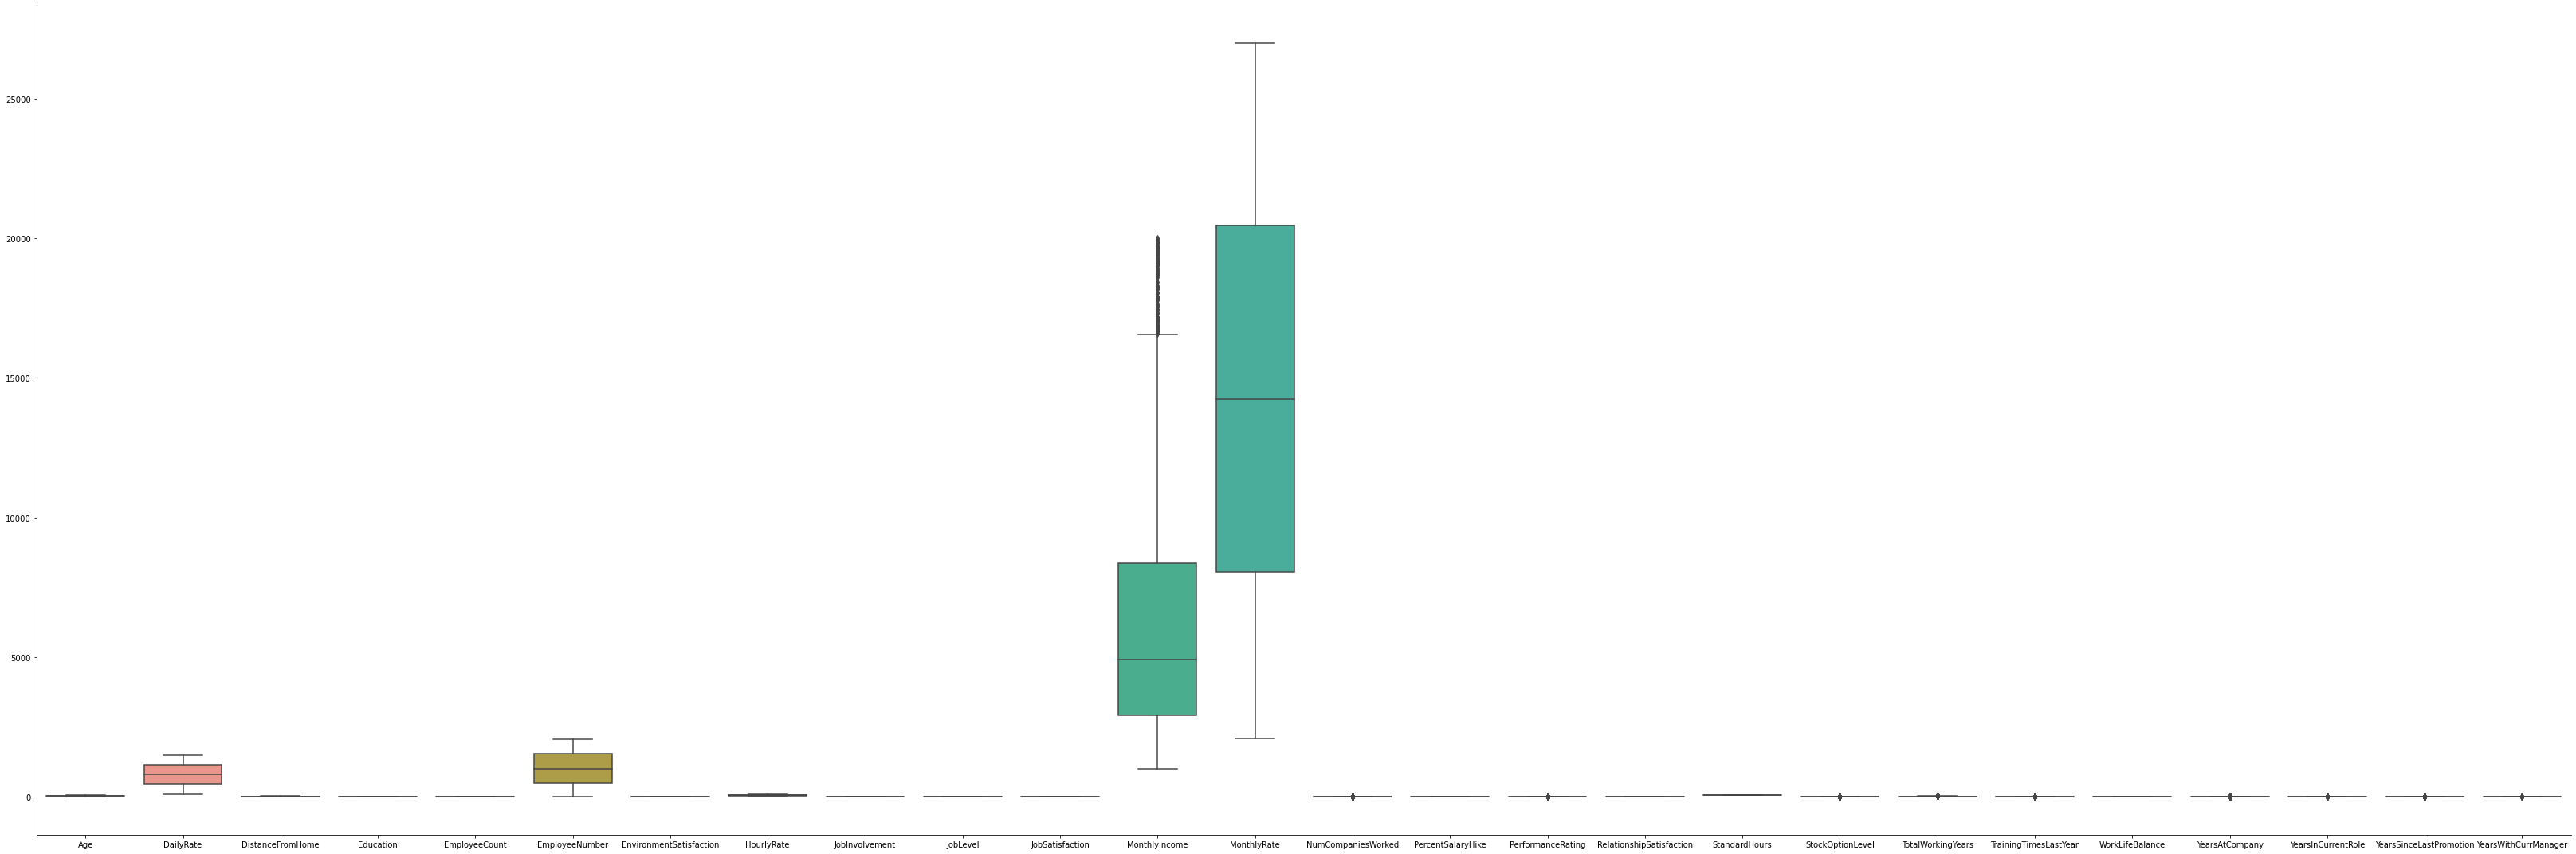

In [10]:
sns.factorplot(data=df,kind='box',size=15,aspect=3)

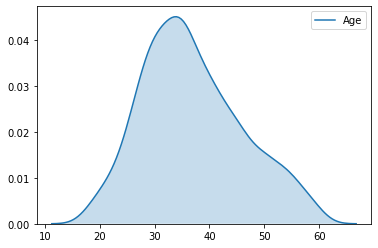

In [11]:
sns.kdeplot(df['Age'],shade=True)

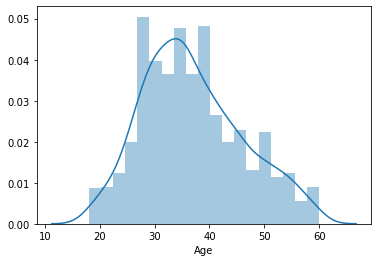

In [12]:
sns.distplot(df['Age'])

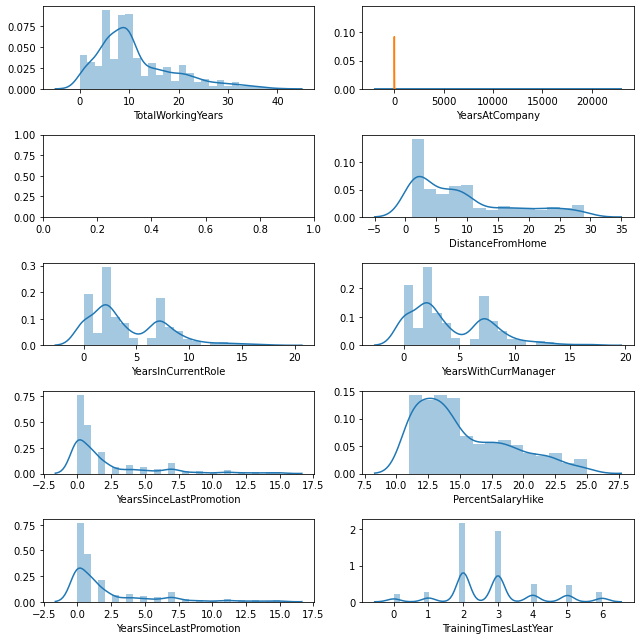

In [13]:
g,ax=plt.subplots(5,2,figsize=(9,9))
sns.distplot(df['TotalWorkingYears'],ax=ax[0,0])
sns.distplot(df['MonthlyIncome'],ax=ax[0,1])
sns.distplot(df['YearsAtCompany'],ax=ax[0,1])
sns.distplot(df['DistanceFromHome'],ax=ax[1,1])
sns.distplot(df['YearsInCurrentRole'],ax=ax[2,0])
sns.distplot(df['YearsWithCurrManager'],ax=ax[2,1])
sns.distplot(df['YearsSinceLastPromotion'],ax=ax[3,0])
sns.distplot(df['PercentSalaryHike'],ax=ax[3,1])
sns.distplot(df['YearsSinceLastPromotion'],ax=ax[4,0])
sns.distplot(df['TrainingTimesLastYear'],ax=ax[4,1])
plt.tight_layout()
plt.show()

now analyzing various categorical features 

In [14]:
df_new=df.select_dtypes(include='object')

In [15]:
df_new.columns


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [16]:
#now define a function which can accept the name of string 
def plt_catt(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='cout',size=5,aspect=3,x=attr)
        return
    
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)
         

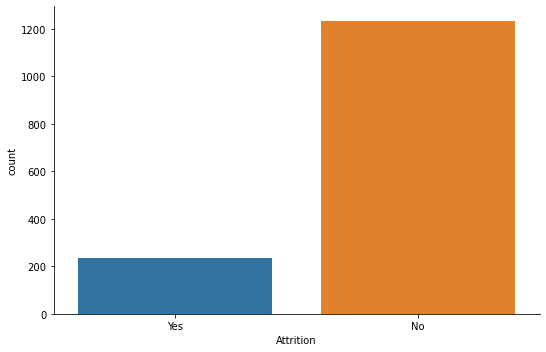

In [17]:
plt_catt('Attrition')

note that the number of observation belongs to no category is way greater than that belonging to 'YES' category 

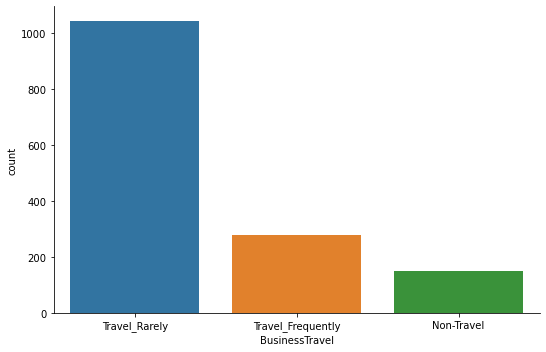

In [18]:
plt_catt('BusinessTravel')

abobe plot shows the nmost of people belong to the 'travel rarely ' class

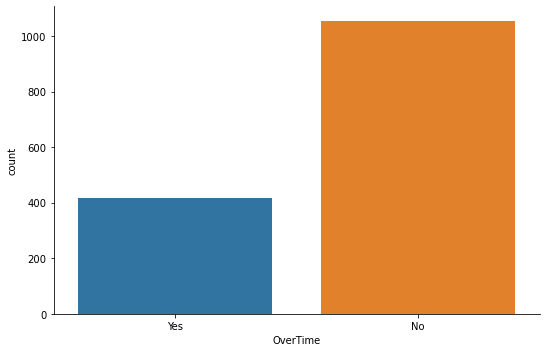

In [19]:
plt_catt('OverTime')

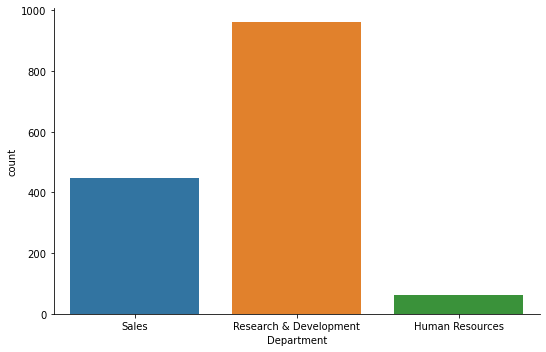

In [20]:
plt_catt('Department')

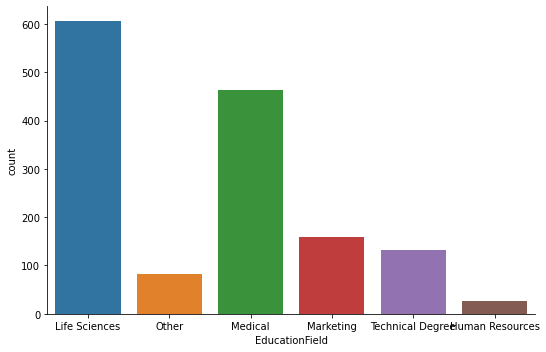

In [21]:
plt_catt('EducationField')

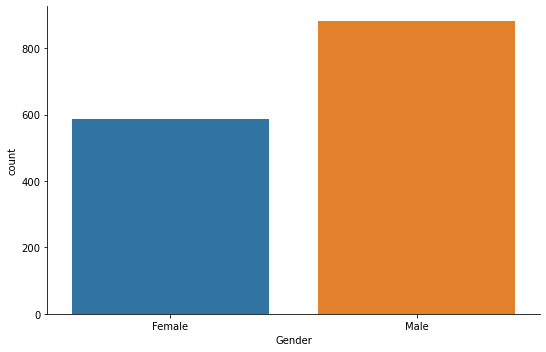

In [22]:
plt_catt('Gender')

correlation b/w features

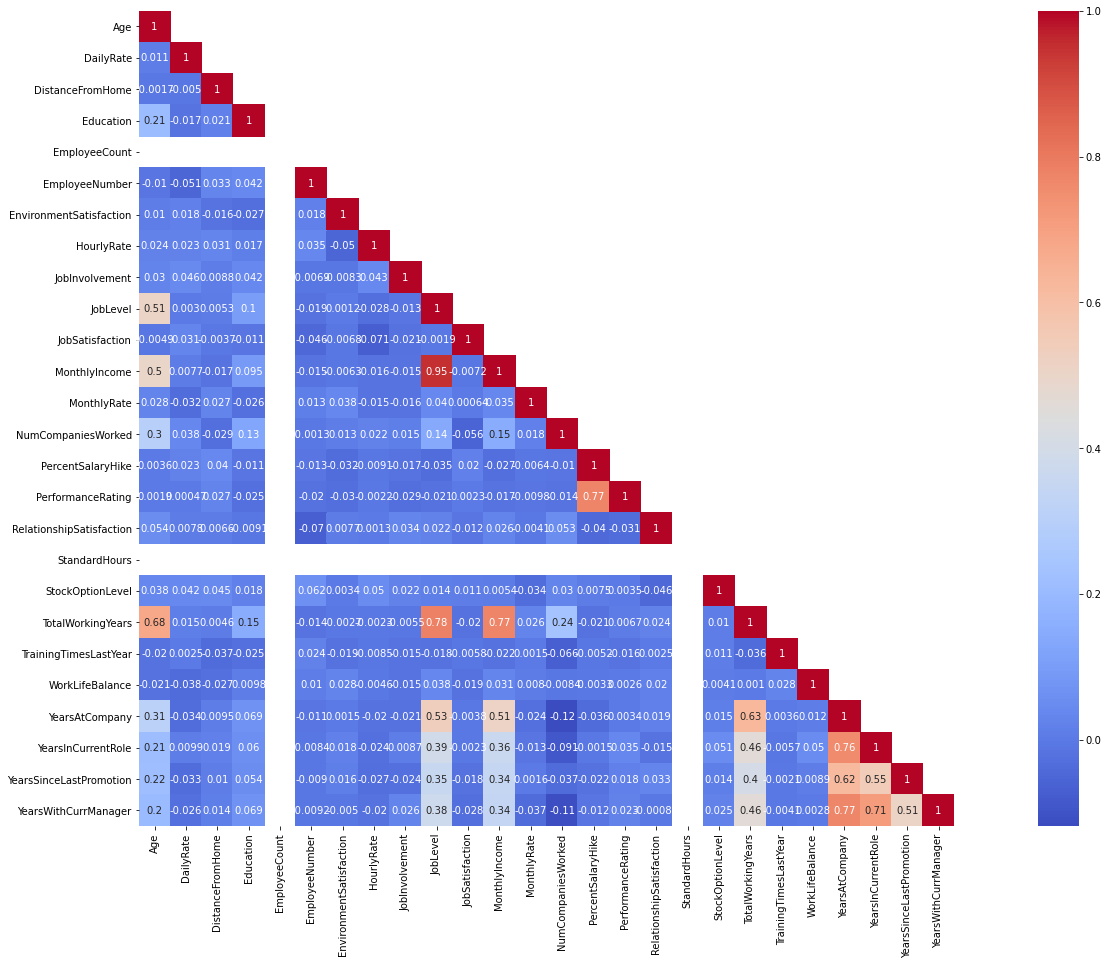

In [23]:
#correlation matrix
corr_mat=df.corr()
mat=np.array(corr_mat)
mat[np.tril_indices_from(mat)]=False
fig=plt.gcf()
fig.set_size_inches(30,15)
sns.heatmap(data=corr_mat,mask=mat,square=True,annot=True,cbar=True,cmap='coolwarm')

1. joblevel is higly correlaed to Age as expected as Aged employees will generally te d to occupy higher positions in the company

2. MontholyIncome is highly correlated joblevel as expected senior will defintly earn more


3. PerformanceRating is highly related to percentSalaryHike which is quite obvious

4. TotalWorkingTears is also highly correlated to JobLevel

5. YearsWithCurrManager is highly related to YearsAtCompany

6. YearsAtCompany is related to YearsInCurrentRole

# PCA

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

feature selection

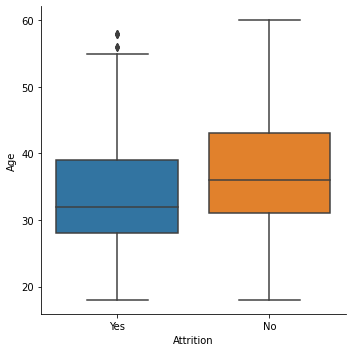

In [25]:
#plotting the featues against the Ttarget Variable
#1.Age
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')


In [26]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

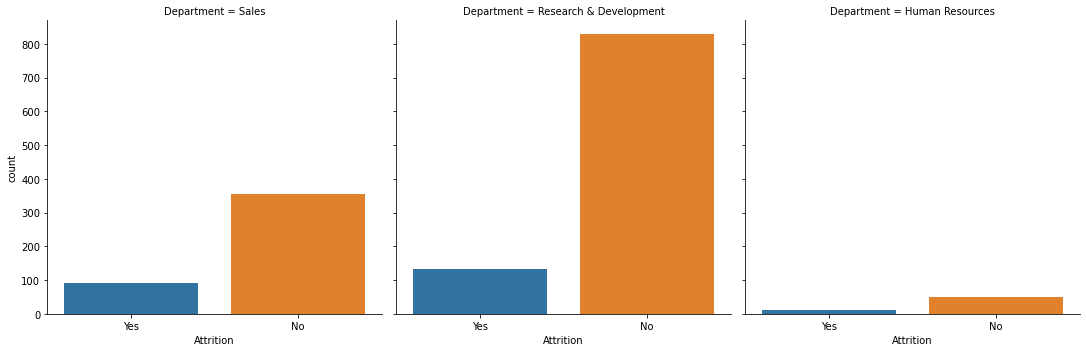

In [27]:
sns.factorplot(data=df,col='Department',x='Attrition',kind='count')

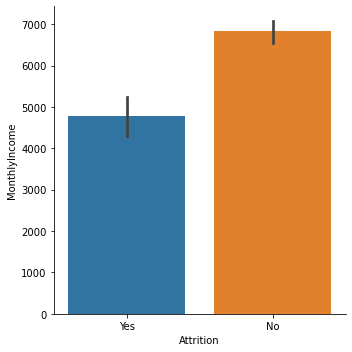

In [28]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

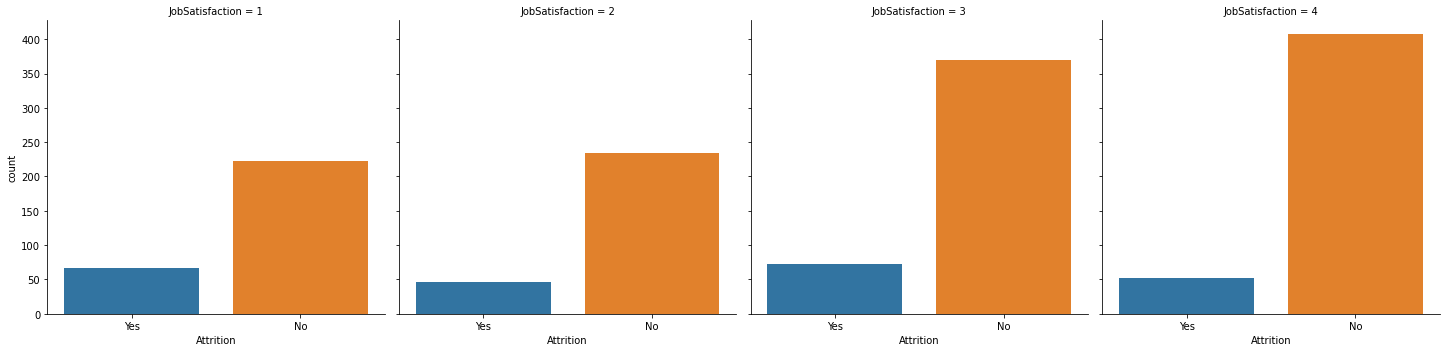

In [29]:
sns.factorplot(data=df,col='JobSatisfaction',x='Attrition',kind='count')

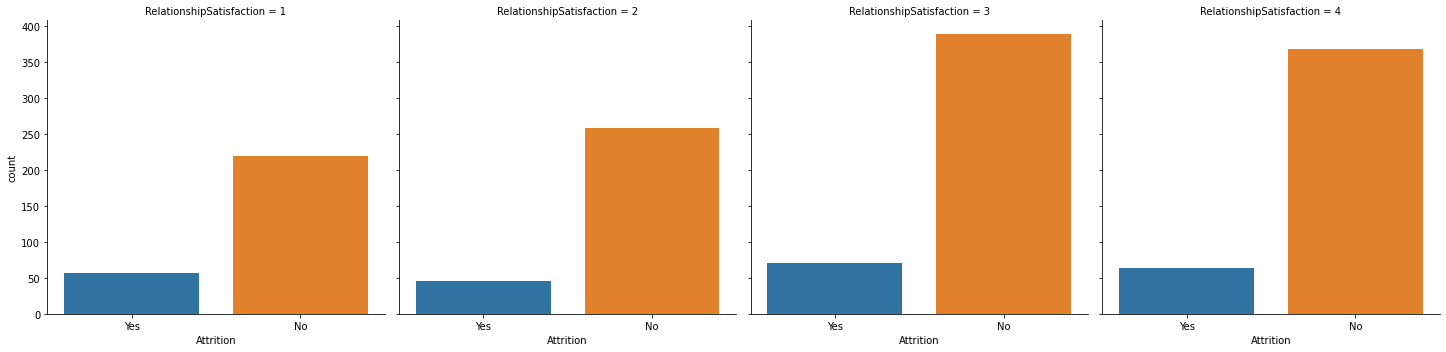

In [30]:
sns.factorplot(data=df,col='RelationshipSatisfaction',x='Attrition',kind='count')

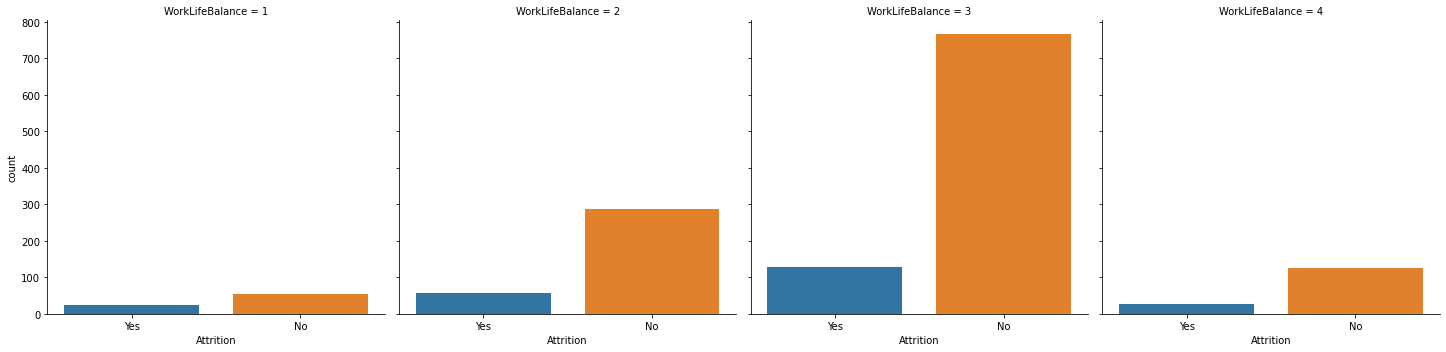

In [31]:
sns.factorplot(data=df,col='WorkLifeBalance',x='Attrition',kind='count')

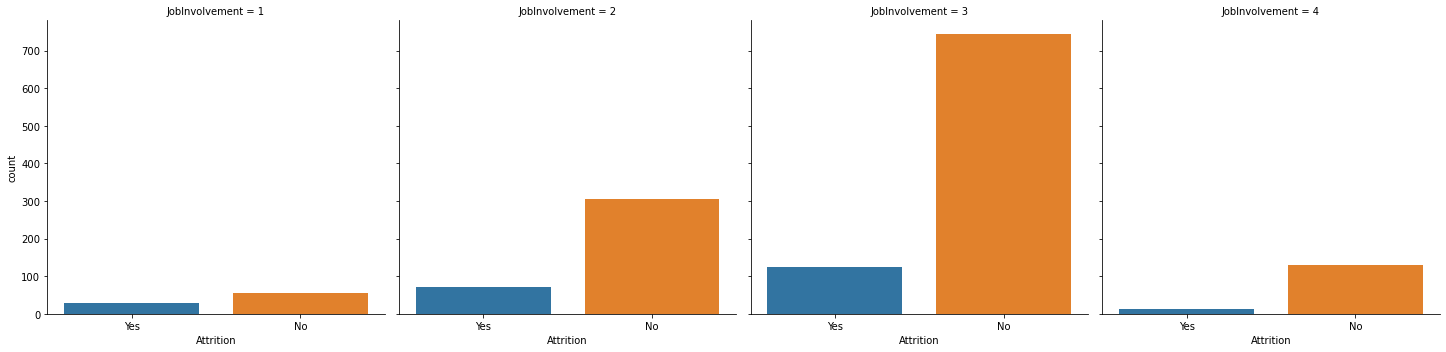

In [32]:
sns.factorplot(data=df,col='JobInvolvement',x='Attrition',kind='count')

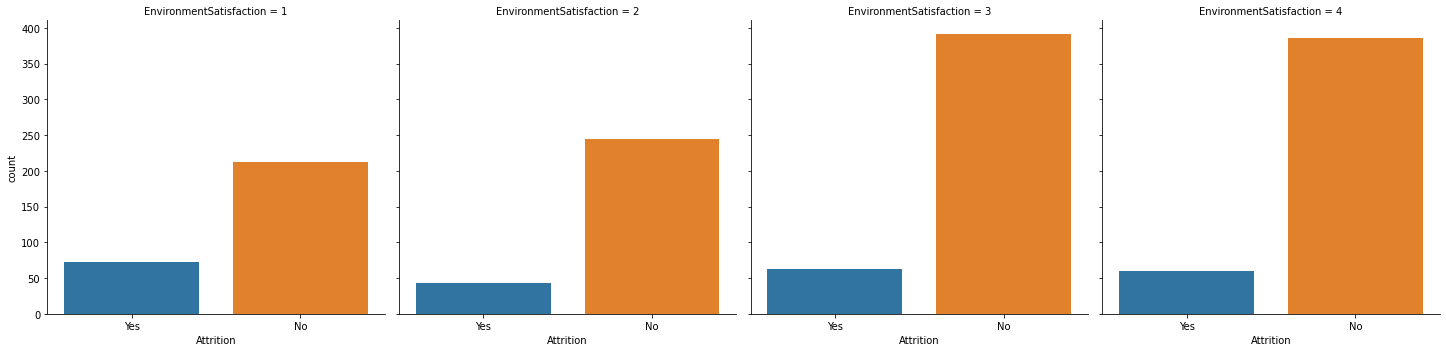

In [33]:
sns.factorplot(data=df,col='EnvironmentSatisfaction',x='Attrition',kind='count')

In [34]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In [35]:
#feature Encoding
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [36]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [37]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [38]:
#feature scaling
sc=StandardScaler()
sc_df=sc.fit_transform(df.drop('Attrition',axis=1))
X=sc_df
Y=df['Attrition']

splitting the data test and training

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# MODELLING

In [40]:
def compare(model):
    clf=model
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    
    
    #calculating various metrics 
    accu.append(accuracy_score(pred,y_test))
    precision.append(precision_score(pred,y_test))
    recall.append(recall_score(pred,y_test))
    aucroc.append(roc_auc_score(pred,y_test))

In [41]:
from sklearn.svm import SVC
accu=[]
precision=[]
recall=[]
aucroc=[]
models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier']
for model in range(len(models)):
    compare(models[model])
    
d={'Model':model_names,'Accuracy':accu,'precison':precision,'Recall':recall,'Area Under ROC curve':aucroc}
met_df=pd.DataFrame(d)
met_df

,Model,Accuracy,precison,Recall,Area Under ROC curve
0,rbfSVM,0.888587,0.145833,1.000000,0.943213
1,RandomForestClassifier,0.869565,0.125000,0.500000,0.691011
2,GradientBoostingClassifier,0.864130,0.208333,0.454545,0.672359


comparing different models 

In [42]:
def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Model',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=met_df,x=metric,y='Model',size=7,aspect=2,kind='point')

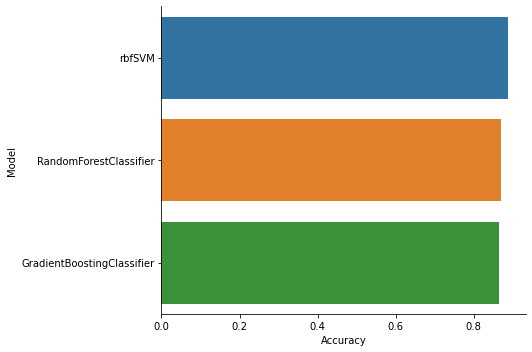

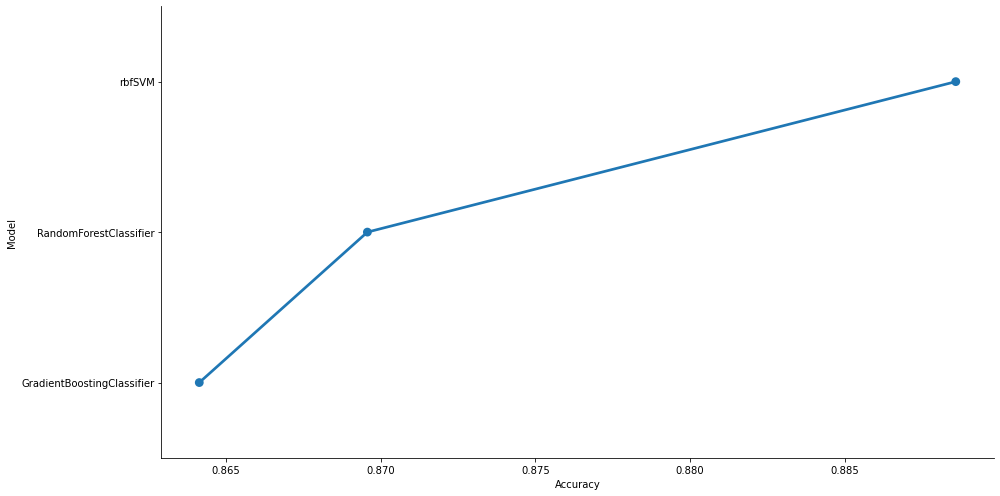

In [43]:
comp_models(met_df,'Accuracy')

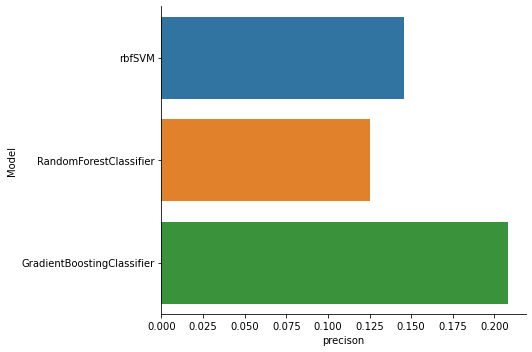

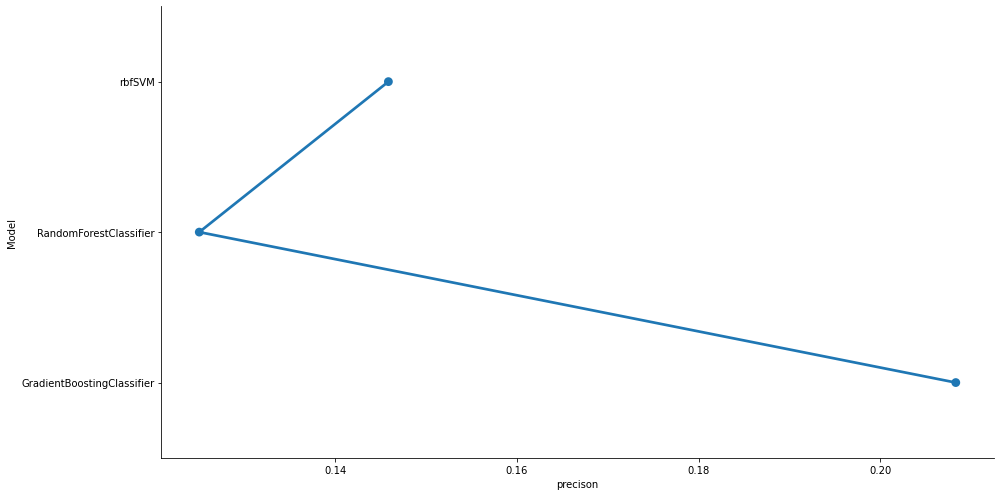

In [44]:
comp_models(met_df,'precison')

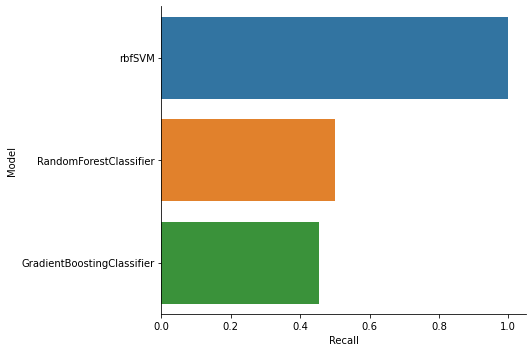

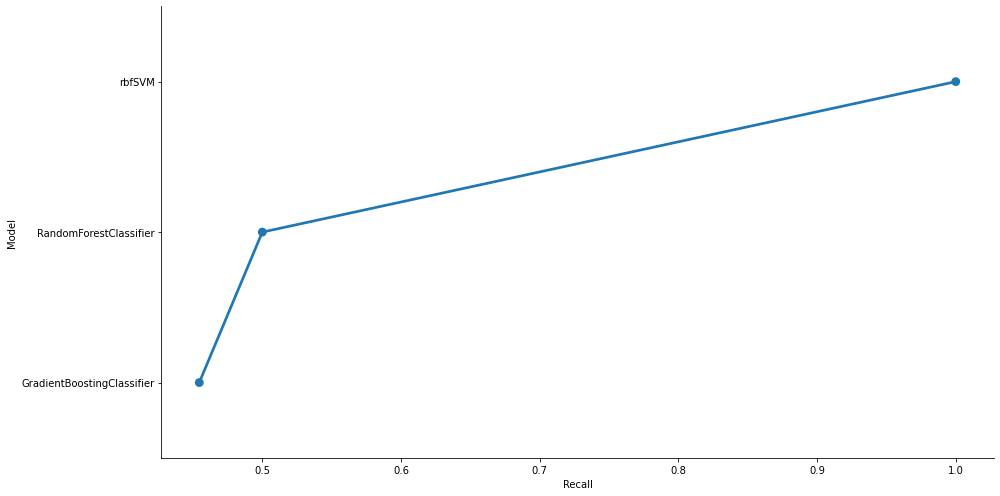

In [45]:
comp_models(met_df,'Recall')

# CONCLUSION

the above data frame and visualisation summerize the results after training diffrent models on the given dataset

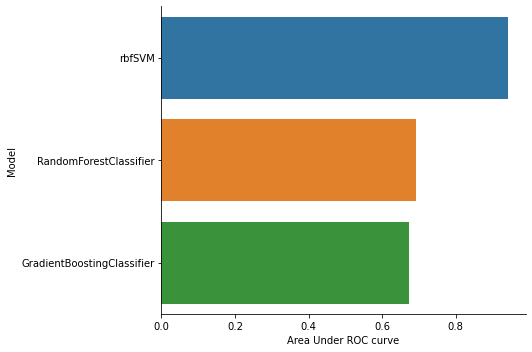

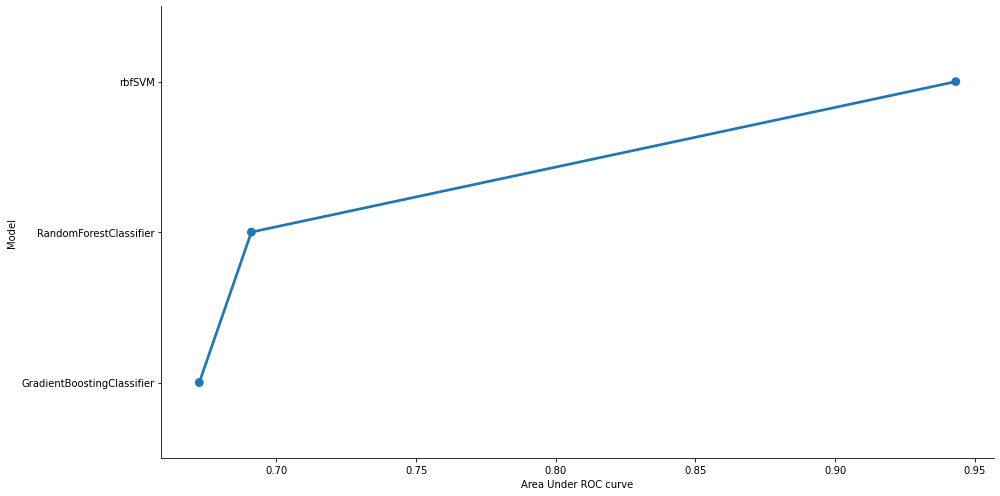

In [46]:
comp_models(met_df,'Area Under ROC curve')